In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os

In [ ]:
# load your google drive
from google.colab import drive
drive.mount('/content/drive')

#change directory
%cd /content/drive/MyDrive/Colab Notebooks/Honeypot_analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TCP_FILE_NAME='data_tcp'
UDP_FILE_NAME='data_udp'
ICMP_FILE_NAME='data_icmp'

In [ ]:
file_name=False
while not (file_name):
  try:
    user_input = int(input("Choose dataset name:\n1)"+TCP_FILE_NAME+"\n2)"+UDP_FILE_NAME+"\n3)"+ICMP_FILE_NAME+"\n"))

    if user_input == 1:
      file_name=TCP_FILE_NAME
    elif user_input == 2:
      file_name=UDP_FILE_NAME
    elif user_input == 3:
      file_name=ICMP_FILE_NAME
    else:
      print ("\nChoose Well\n")

  except ValueError:
    print('\nInvalid number!\n')   

fname=file_name+".csv"

Choose dataset name:
1)data_tcp
2)data_udp
3)data_icmp
2


In [ ]:
# find data file
stream = os.popen("find . -name '%s'" % fname)
fpath = stream.read()[:-1]

In [ ]:
# print data's shape 
df = pd.read_csv(fpath)
print(df.shape)

(13469, 6)


In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,pck_len
0,1.615343e+09,2086,52161.0,5315,5351.0,60
1,1.615343e+09,4780,43706.0,5193,5683.0,63
2,1.615343e+09,2706,27649.0,5321,8082.0,105
3,1.615343e+09,1253,31515.0,5338,2222.0,66
4,1.615343e+09,4787,56142.0,5177,500.0,106
...,...,...,...,...,...,...
13464,1.615347e+09,1184,63338.0,5346,43695.0,62
13465,1.615347e+09,697,8083.0,5143,8082.0,90
13466,1.615347e+09,885,7777.0,5100,32660.0,60
13467,1.615347e+09,885,7777.0,5100,32660.0,60


In [ ]:
#Choose time window
window=False
while not (window):
  try:
    user_input = int(input("Choose time window (10 -> 10s, 60 -> 1m): "))
    if user_input<=0 :
       print ("\nChoose Well\n")
    else:
      window=user_input
  except ValueError:
    print('\nInvalid number!\n') 

Choose time window (10 -> 10s, 60 -> 1m): 10


In [ ]:
#add column user to df with default value 0
df['user']=0

#add column num_attack (user's number of attacks) to df with default value 0
df['num_attack']=0

count = 1

for i, row in df.iterrows():

  if (df.loc[i,'user']==0):
    
    ts=row['ts']
    ip=row['src_ip']

    if file_name!=ICMP_FILE_NAME:
      port=row['src_port']
      x=df[(df['ts']>=ts) & (df['ts']<(ts+window)) & (df['src_ip']==ip) & (df['src_port']==port)].index.tolist()
    else:
      x=df[(df['ts']>=ts) & (df['ts']<(ts+window)) & (df['src_ip']==ip)].index.tolist()

    num_attack=len(x)

    for index in x:      
      df.loc[index, 'user'] = count
      df.loc[index, 'num_attack'] = num_attack

    count = count + 1

In [ ]:
#show df
#display(HTML(df.to_html()))

In [ ]:
# how many different users?
users=df['user'].unique()
num_users=len(users)
print(num_users)

3862


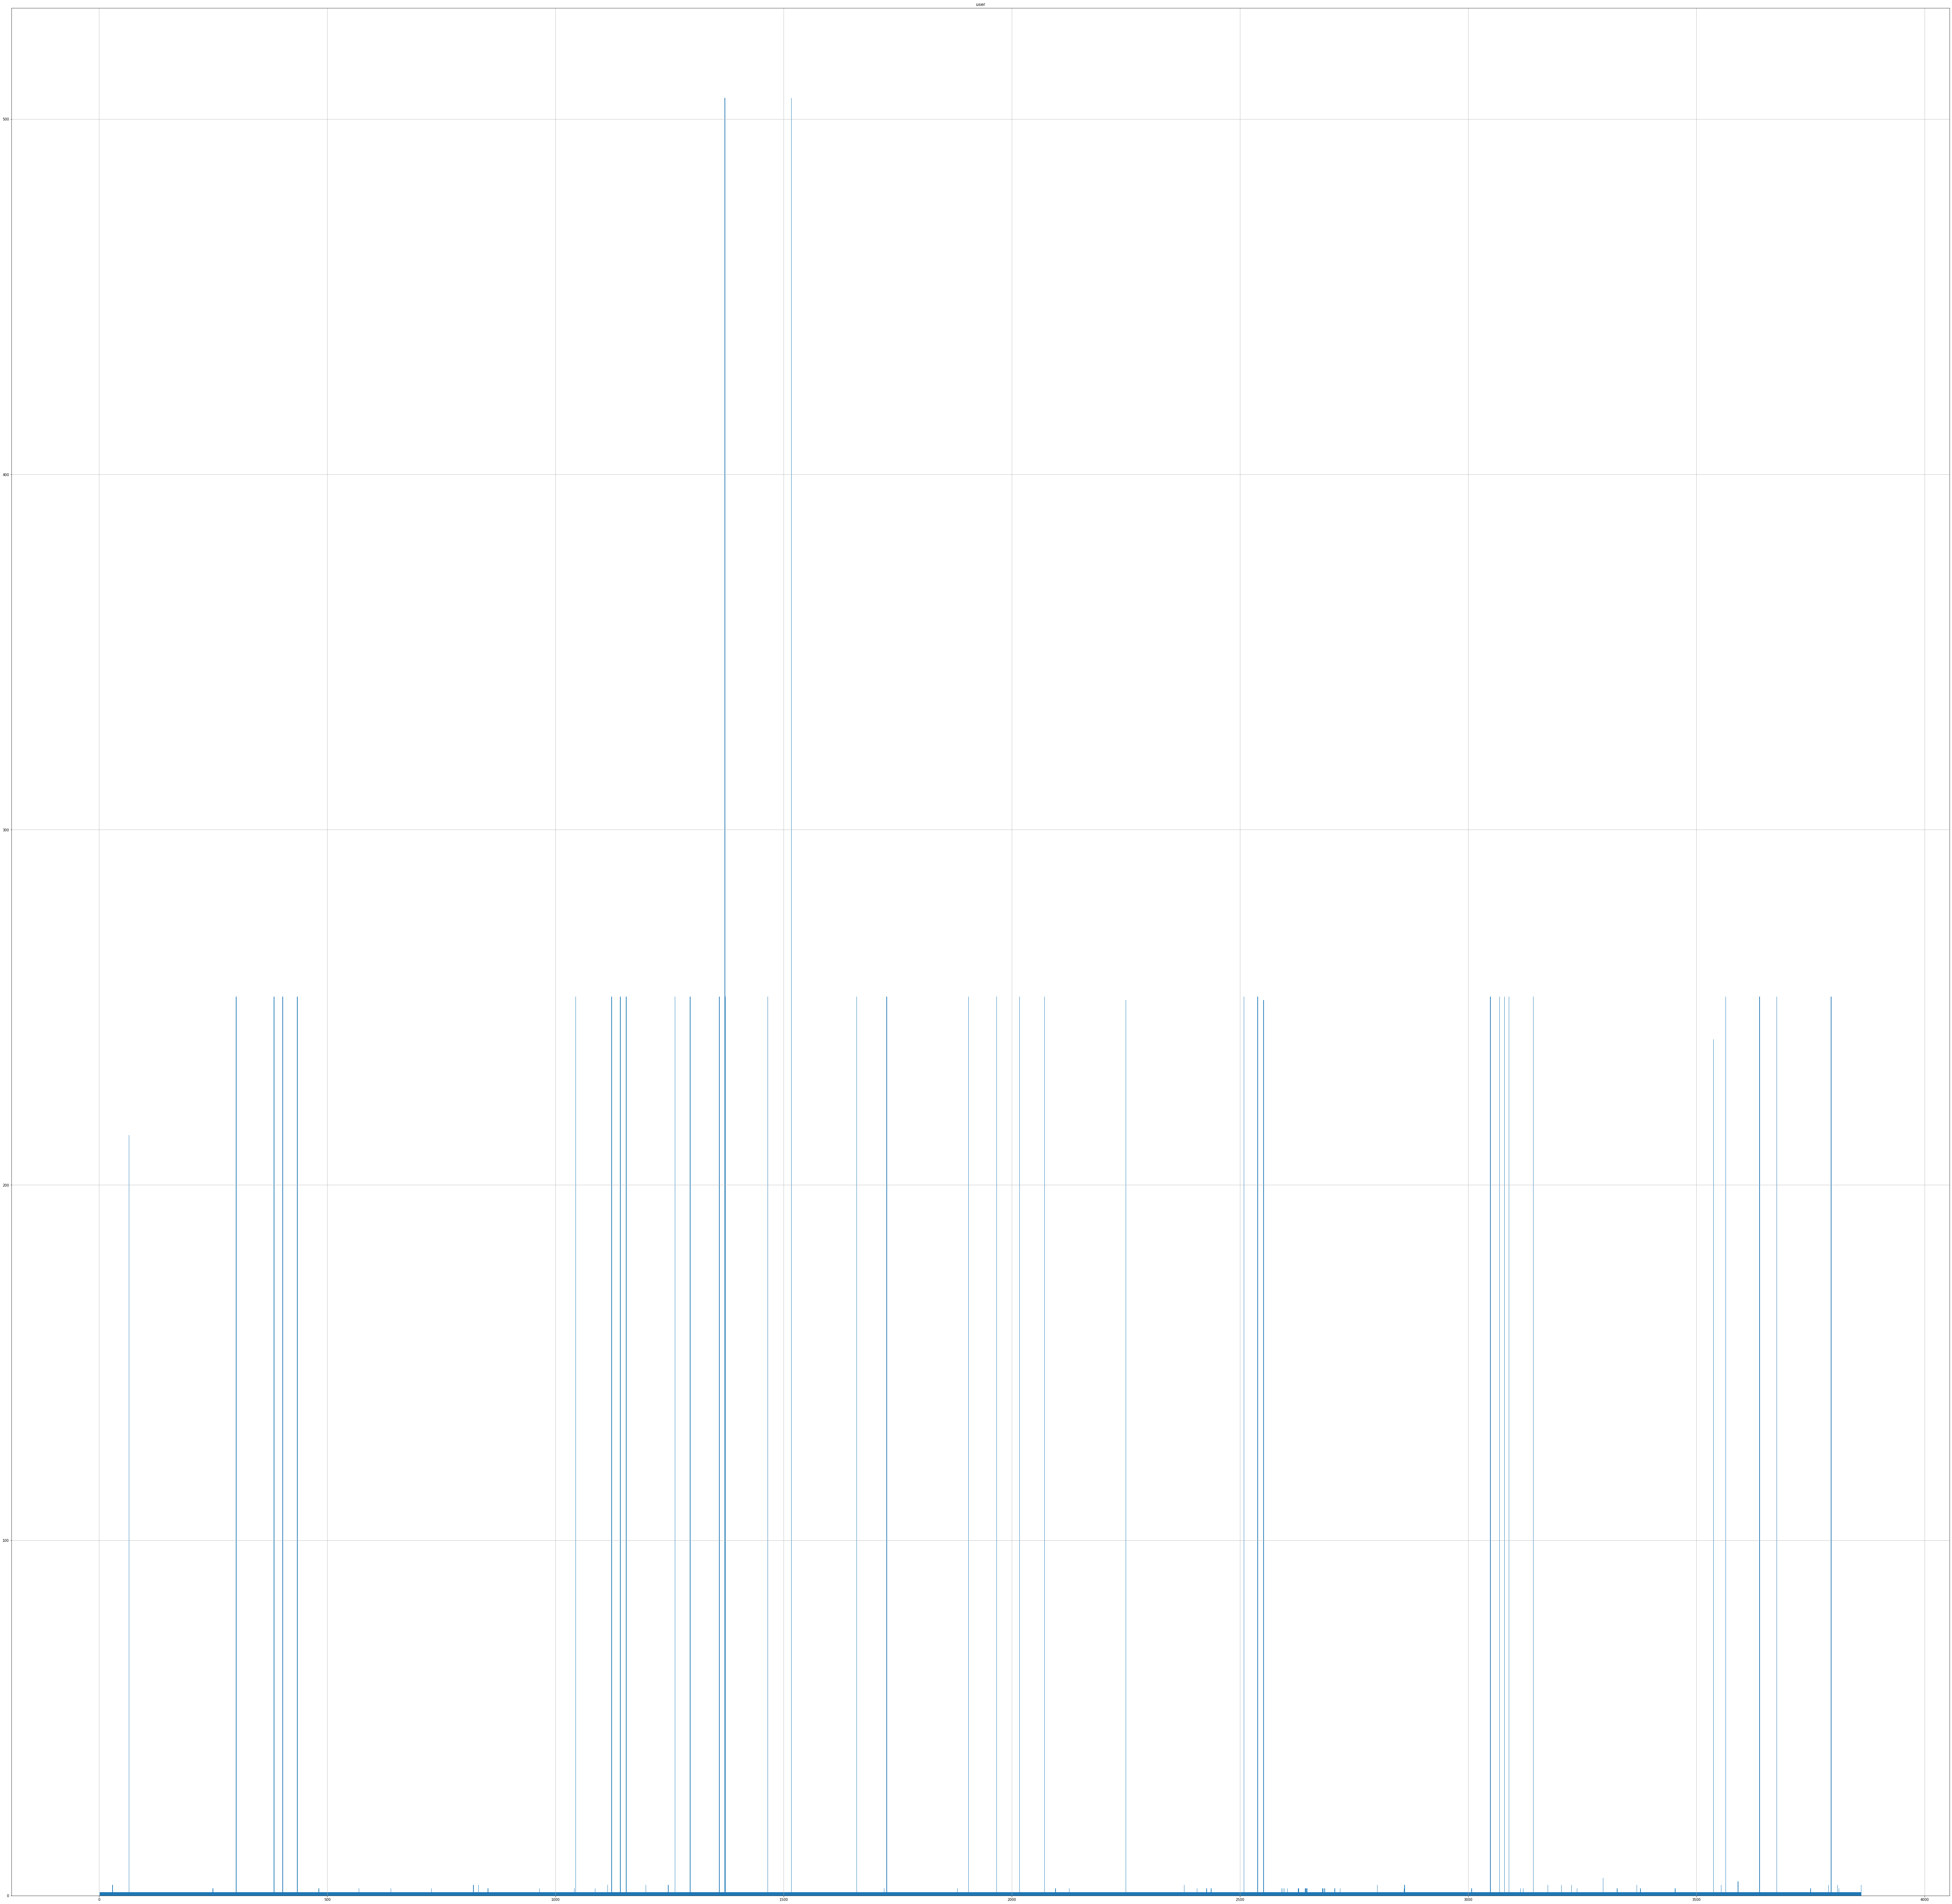

In [ ]:
df.hist(column='user', bins=num_users, figsize=(100,100))
plt.show()

In [ ]:
if file_name!=ICMP_FILE_NAME:

  #add column first port scanned to df with default value 0
  df['first_port_scan']=0

  #set the rigth value at 'first_port_scan'
  for u in users:
      x=df[(df['user']==u)].index.tolist()
      index_first_occurence=x[0]
      first_port=df.loc[index_first_occurence,'dst_port']

      for index in x:      
        df.loc[index, 'first_port_scan'] = first_port 

In [ ]:
#show df
#display(HTML(df.to_html()))

In [ ]:
#set how many different ips attacked by each user
def ip_attacked(users):
  ip=[]
  ip.insert(0,0)
  
  for u in users:
    ip_diff=df[df['user']==u].dst_ip.nunique()
    ip.insert(u,ip_diff)

  #add column  
  df['ip_diff']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'ip_diff']=ip[user]


#set how many different ports attacked by each user
def port_attacked(users):
  
  port=[]
  port.insert(0,0)

  for u in users:
    port_diff=df[df['user']==u].dst_port.nunique()
    port.insert(u,port_diff)

  #add column
  df['port_diff']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'port_diff']=port[user] 

In [ ]:
#set how many different ips and ports attacked by each user
if file_name!=ICMP_FILE_NAME:
  ip_attacked(users)
  port_attacked(users)
else:
  ip_attacked(users)

In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,pck_len,user,num_attack,first_port_scan,ip_diff,port_diff
0,1.615343e+09,2086,52161.0,5315,5351.0,60,1,1,5351.0,1,1
1,1.615343e+09,4780,43706.0,5193,5683.0,63,2,1,5683.0,1,1
2,1.615343e+09,2706,27649.0,5321,8082.0,105,3,1,8082.0,1,1
3,1.615343e+09,1253,31515.0,5338,2222.0,66,4,1,2222.0,1,1
4,1.615343e+09,4787,56142.0,5177,500.0,106,5,1,500.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13464,1.615347e+09,1184,63338.0,5346,43695.0,62,3860,1,43695.0,1,1
13465,1.615347e+09,697,8083.0,5143,8082.0,90,3861,1,8082.0,1,1
13466,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1
13467,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1


In [ ]:
# range ip
def range_Ip(users):
  range_ip=[]
  range_ip.insert(0,0)
  
  for u in users:
    max_ip=df[df['user']==u].dst_ip.max()
    min_ip=df[df['user']==u].dst_ip.min()
    range_ip.insert(u,max_ip-min_ip)

  #add columns to df
  df['range_ip']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'range_ip']=range_ip[user]



# range port
def range_Port(users):
  range_port=[]
  range_port.insert(0,0)

  for u in users:
    max_port=df[df['user']==u].dst_port.max()
    min_port=df[df['user']==u].dst_port.min()
    range_port.insert(u,max_port-min_port)

  #add columns to df
  df['range_port']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'range_port']=range_port[user] 


In [ ]:
# range ip & range port
if file_name!=ICMP_FILE_NAME:
  range_Ip(users)
  range_Port(users)
else:
  range_Ip(users)

In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,pck_len,user,num_attack,first_port_scan,ip_diff,port_diff,range_ip,range_port
0,1.615343e+09,2086,52161.0,5315,5351.0,60,1,1,5351.0,1,1,0,0
1,1.615343e+09,4780,43706.0,5193,5683.0,63,2,1,5683.0,1,1,0,0
2,1.615343e+09,2706,27649.0,5321,8082.0,105,3,1,8082.0,1,1,0,0
3,1.615343e+09,1253,31515.0,5338,2222.0,66,4,1,2222.0,1,1,0,0
4,1.615343e+09,4787,56142.0,5177,500.0,106,5,1,500.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1.615347e+09,1184,63338.0,5346,43695.0,62,3860,1,43695.0,1,1,0,0
13465,1.615347e+09,697,8083.0,5143,8082.0,90,3861,1,8082.0,1,1,0,0
13466,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1,0,0
13467,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1,0,0


In [ ]:
# ip medium & ip standard deviation 
def ip_medium_std(users):
  ip_m=[]
  ip_m.insert(0,0)
  ip_s=[]
  ip_s.insert(0,0)

  for u in users:
    ips=df[df['user']==u].dst_ip.tolist()
    avg_ip = np.mean(ips)
    std_ip = np.std(ips)
    ip_m.insert(u,avg_ip)
    ip_s.insert(u,std_ip)
  
  #add columns to df
  df['ip_medium']=0
  df['ip_std']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'ip_medium']=ip_m[user]
    df.loc[i,'ip_std']=ip_s[user]



# port medium & port standard deviation
def port_medium_std(users):
  port_m=[]
  port_m.insert(0,0)
  port_s=[]
  port_s.insert(0,0)

  for u in users:
    ports=df[df['user']==u].dst_port.tolist()
    avg_p = np.mean(ports)
    std_p = np.std(ports)
    port_m.insert(u,avg_p)
    port_s.insert(u,std_p)

  #add columns to df
  df['port_medium']=0
  df['port_std']=0

  for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'port_medium']=port_m[user]
    df.loc[i,'port_std']=port_s[user]      

In [ ]:
# ip medium & ip standard deviation 
# port medium & port standard deviation
if file_name == ICMP_FILE_NAME:
  ip_medium_std(users)
else:
  ip_medium_std(users)
  port_medium_std(users)

In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,pck_len,user,num_attack,first_port_scan,ip_diff,port_diff,range_ip,range_port,ip_medium,ip_std,port_medium,port_std
0,1.615343e+09,2086,52161.0,5315,5351.0,60,1,1,5351.0,1,1,0,0,5315.0,0.0,5351.0,0.0
1,1.615343e+09,4780,43706.0,5193,5683.0,63,2,1,5683.0,1,1,0,0,5193.0,0.0,5683.0,0.0
2,1.615343e+09,2706,27649.0,5321,8082.0,105,3,1,8082.0,1,1,0,0,5321.0,0.0,8082.0,0.0
3,1.615343e+09,1253,31515.0,5338,2222.0,66,4,1,2222.0,1,1,0,0,5338.0,0.0,2222.0,0.0
4,1.615343e+09,4787,56142.0,5177,500.0,106,5,1,500.0,1,1,0,0,5177.0,0.0,500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1.615347e+09,1184,63338.0,5346,43695.0,62,3860,1,43695.0,1,1,0,0,5346.0,0.0,43695.0,0.0
13465,1.615347e+09,697,8083.0,5143,8082.0,90,3861,1,8082.0,1,1,0,0,5143.0,0.0,8082.0,0.0
13466,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1,0,0,5100.0,0.0,32660.0,0.0
13467,1.615347e+09,885,7777.0,5100,32660.0,60,3862,3,32660.0,1,1,0,0,5100.0,0.0,32660.0,0.0


In [ ]:
# medium packet length and standard deviation 

pck_m=[]
pck_m.insert(0,0)
pck_s=[]
pck_s.insert(0,0)

for u in users:
  m=df[df['user']==u].pck_len.tolist()
  pck_m.insert(u,np.mean(m))

  s=df[df['user']==u].pck_len.tolist()  
  pck_s.insert(u,np.std(s))

#add column
df['pck_medium']=0
df['pck_std']=0

for i, row in df.iterrows():
    user=df.loc[i,'user']
    df.loc[i,'pck_medium']=pck_m[user]
    df.loc[i,'pck_std']=pck_s[user]

In [ ]:
folder='df_window_'+str(window)

if not(folder in os.listdir()):
  os.mkdir(folder)
    
output_name=file_name+"_"+str(window)+".csv"
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/SecurityProject/'+folder+'/'+output_name, index=False)